In [1]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time

cmap = sns.diverging_palette(220, 15, as_cmap=True)


# Supress Scientific notation in python
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Display all columns of long dataframe
pd.set_option('display.max_columns', None)


In [3]:
#open file
business='metrics.csv'
df=pd.read_csv(business)
print(df.head(3))

   id      date  season  holiday  weekday  workingday  weathersit  temp  \
0   1  1/1/2011       1        0        6           0           2  0.34   
1   2  1/2/2011       1        0        0           0           2  0.36   
2   3  1/3/2011       1        0        1           1           1  0.20   

   atemp  hum  windspeed  casual  registered   cnt  
0   0.36 0.81       0.16     331         654   985  
1   0.35 0.70       0.25     131         670   801  
2   0.19 0.44       0.25     120        1229  1349  


In [20]:
#parse index
df['date']=pd.to_datetime(df['date'], infer_datetime_format=True)
indexeddf=df.set_index(['date'])
#print(indexeddf)


#parsing to time format and extracting dates with 'created_at'
x=df['date']=pd.to_datetime(df['date'], format='%m-%d-%y')

Day=df['date'].dt.day_name()
Month=df['date'].dt.month_name()
Year=df['date'].dt.year

#subsetting timeseries
df['Year']=df['date'].dt.year
df['Month']=df['date'].dt.month_name()
df['Day']=df['date'].dt.day

print(df.head(5))

   id       date  season  holiday  weekday  workingday  weathersit  temp  \
0   1 2011-01-01       1        0        6           0           2  0.34   
1   2 2011-01-02       1        0        0           0           2  0.36   
2   3 2011-01-03       1        0        1           1           1  0.20   
3   4 2011-01-04       1        0        2           1           1  0.20   
4   5 2011-01-05       1        0        3           1           1  0.23   

   atemp  hum  windspeed  casual  registered   cnt  Year    Month  Day  
0   0.36 0.81       0.16     331         654   985  2011  January    1  
1   0.35 0.70       0.25     131         670   801  2011  January    2  
2   0.19 0.44       0.25     120        1229  1349  2011  January    3  
3   0.21 0.59       0.16     108        1454  1562  2011  January    4  
4   0.23 0.44       0.19      82        1518  1600  2011  January    5  


# Weekly mean bike shared

In [24]:
#index per week

#day_index per week 'D' 
week_index=indexeddf.resample('W').mean()
print(week_index.head(7))


              id  season  holiday  weekday  workingday  weathersit  temp  \
date                                                                       
2011-01-02  1.50    1.00     0.00     3.00        0.00        2.00  0.35   
2011-01-09  6.00    1.00     0.00     3.00        0.71        1.29  0.19   
2011-01-16 13.00    1.00     0.00     3.00        0.71        1.29  0.18   
2011-01-23 20.00    1.00     0.14     3.00        0.57        1.57  0.18   
2011-01-30 27.00    1.00     0.00     3.00        0.71        1.57  0.19   
2011-02-06 34.00    1.00     0.00     3.00        0.71        1.71  0.22   
2011-02-13 41.00    1.00     0.00     3.00        0.71        1.14  0.21   

            atemp  hum  windspeed  casual  registered     cnt    Year   Day  
date                                                                         
2011-01-02   0.36 0.75       0.20  231.00      662.00  893.00 2011.00  1.50  
2011-01-09   0.19 0.49       0.21   95.43     1248.57 1344.00 2011.00  6.00  
201

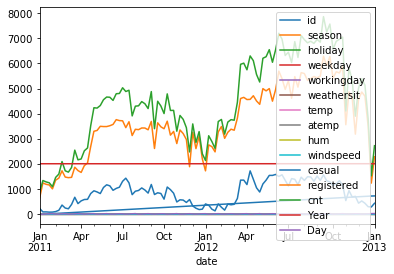

In [25]:
week_index.plot()